In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier, plot_tree

import os
from itertools import combinations

In [2]:
os.listdir('./input/')

['sensor_readings_4.data']

In [242]:
data = np.loadtxt('./input/sensor_readings_4.data', delimiter=',', dtype=str)

# shuffle the data
np.random.seed(0)
np.random.shuffle(data)

data

array([['2.935', '0.426', '1.424', '0.370', 'Slight-Right-Turn'],
       ['1.310', '0.517', '1.691', '0.914', 'Move-Forward'],
       ['1.731', '0.482', '1.991', '1.072', 'Slight-Right-Turn'],
       ...,
       ['2.243', '0.392', '1.919', '1.438', 'Slight-Right-Turn'],
       ['1.651', '1.414', '1.688', '2.027', 'Slight-Left-Turn'],
       ['0.823', '0.963', '0.895', '2.407', 'Sharp-Right-Turn']],
      dtype='<U17')

In [246]:
feature_names = ['front', 'left', 'right', 'back']
features_df = pd.DataFrame(data[:, :-1], columns=feature_names, dtype=float)
labels_df = pd.DataFrame(data[:, -1], columns=['label'])
data_df = pd.concat([features_df, labels_df], axis=1)

# make the unit centimeter
centimeterize = np.vectorize(lambda x: int(np.round(x*100)))
data_df.iloc[:, :-1] = centimeterize(data_df.iloc[:, :-1])
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 5 columns):
front    5456 non-null int64
left     5456 non-null int64
right    5456 non-null int64
back     5456 non-null int64
label    5456 non-null object
dtypes: int64(4), object(1)
memory usage: 213.2+ KB


In [247]:
data_df.head(10)

,front,left,right,back,label
0,294,43,142,37,Slight-Right-Turn
1,131,52,169,91,Move-Forward
2,173,48,199,107,Slight-Right-Turn
3,201,48,194,169,Slight-Right-Turn
4,81,54,169,130,Sharp-Right-Turn
5,110,59,116,116,Move-Forward
6,77,87,134,80,Sharp-Right-Turn
7,84,43,144,38,Sharp-Right-Turn
8,81,53,170,130,Sharp-Right-Turn
9,204,60,189,164,Move-Forward


In [5]:
data_df.describe()

,front,left,right,back
count,5456.000000,5456.000000,5456.000000,5456.000000
mean,129.032991,68.125183,188.179069,127.368585
std,62.666762,34.256587,56.258817,82.175752
min,50.000000,34.000000,84.000000,37.000000
25%,83.000000,50.000000,147.000000,79.000000
50%,109.000000,61.000000,175.000000,107.000000
75%,152.000000,75.000000,214.000000,140.000000
max,500.000000,500.000000,500.000000,500.000000


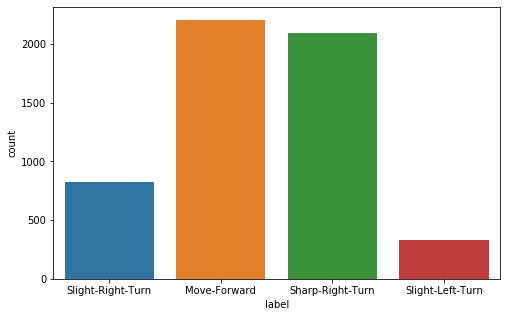

In [6]:
plt.figure(figsize=(8,5))
sns.countplot(x='label', data=data_df[['label']])
plt.show()

In [7]:
features = data_df.iloc[:, :-1].values
labels = data_df.iloc[:, -1].values

# encode labels
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels)
encoder.classes_

array(['Move-Forward', 'Sharp-Right-Turn', 'Slight-Left-Turn',
       'Slight-Right-Turn'], dtype=object)

In [8]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, encoded_labels, test_size=0.3, shuffle=False)

In [196]:
# write data to file (test_datax.h)
file_count = 2
X_split = np.array_split(X_test, file_count)
y_split = np.array_split(y_test, file_count)

for i in range(file_count):
    file = open('test_data%d.h' % (i), 'w')
    
    print(X_split[i].shape)
    print(y_split[i].shape)
    print()
    
    file.write('#define INPUT_SIZE %d\n\n' % (X_split[i].shape[0]))
    
    file.write('#define INPUT_DATA ')
    for row in X_split[i]:
        for data in row:
            file.write(str(data) + ',')
    file.write('\n\n')
    
    file.write('#define CORRECT_LABEL ')
    for lbl in y_split[i]:
        file.write(str(lbl) + ',')
    file.write('\n')
    
    file.close()

(819, 4)
(819,)

(818, 4)
(818,)



In [9]:
def print_performance_scores(y_true, y_preds):
    print('Accuracy:', accuracy_score(y_true, y_preds))
    print()
    print('No average')
    print('Precision:', precision_score(y_true, y_preds, average=None))
    print('Recall:', recall_score(y_true, y_preds, average=None))
    print('F1:', f1_score(y_true, y_preds, average=None))
    print()
    print('Micro average')
    print('Precision:', precision_score(y_true, y_preds, average='micro'))
    print('Recall:', recall_score(y_true, y_preds, average='micro'))
    print('F1:', f1_score(y_true, y_preds, average='micro'))
    print()
    print('Macro average')
    print('Precision:', precision_score(y_true, y_preds, average='macro'))
    print('Recall:', recall_score(y_true, y_preds, average='macro'))
    print('F1:', f1_score(y_true, y_preds, average='macro'))

# MLP

In [250]:
# train MLP classifier
mlp = MLPClassifier(activation='logistic', alpha=0.01, hidden_layer_sizes=(40,),
                    solver='lbfgs', random_state=1, max_iter=10000)
mlp.fit(X_train, y_train)
y_preds = mlp.predict(X_test)

In [251]:
print_performance_scores(y_test, y_preds)

Accuracy: 0.9816737935247404

No average
Precision: [0.98015267 0.98104265 0.98979592 0.98406375]
Recall: [0.97568389 0.99043062 0.97       0.98015873]
F1: [0.97791318 0.98571429 0.97979798 0.98210736]

Micro average
Precision: 0.9816737935247404
Recall: 0.9816737935247404
F1: 0.9816737935247404

Macro average
Precision: 0.9837637472928571
Recall: 0.9790683106864517
F1: 0.9813831993275136


In [294]:
from sklearn.utils.extmath import safe_sparse_dot
from scipy.special import expit as logistic_sigmoid
from sklearn.neural_network._base import softmax

def calc_network(data, y):
    hidden_out = np.dot(data, hidden_w) + hidden_b
    hidden_activated = logistic_sigmoid(hidden_out)
    print(hidden_activated.shape, output_w.shape)
    output_out = np.dot(hidden_activated, output_w) + output_b
    output_activated = softmax(output_out.copy())
    calc_preds = output_activated.argmax(axis=1)
    print ('Performance - ' + str(100*accuracy_score(calc_preds, y)) + '%')
    return [data, hidden_out, hidden_activated, output_out, output_activated]

def print_stats(stats):
    print('Input Layer:')
    print('\tMax:', stats[0].max())
    print('\tMin:', stats[0].min())
    print('----------------------------------')
    print('Hidden Layer:')
    print('\tOut Max:', stats[1].max())
    print('\tOut Min:', stats[1].min())
    print('\tAct Max:', stats[2].max())
    print('\tAct Min:', stats[2].min())
    print('----------------------------------')
    print('Output Layer:')
    print('\tOut Max:', stats[3].max())
    print('\tOut Min:', stats[3].min())
    print('\tAct Max:', stats[4].max())
    print('\tAct Min:', stats[4].min())

def calc_int_bit(arr):
    return int(np.floor(np.log2(max(abs(arr.max()), abs(arr.min())))) + 1)

def calc_frac_bit(arr, total_bits):
    return total_bits - 1 - calc_int_bit(arr)

def quant_weigt(weight, frac_bits):
    return np.round(weight*(2**frac_bits)).astype(int)

def write_x2_array_to_file(array, name, file):
    weight = np.reshape(array.transpose(), (array.shape[1], array.shape[0], 1, 1))
    print(weight.shape)
    file.write('#define ' + name + '_X2 ')
    weight.tofile(file,sep=',',format='%d')
    file.write('\n\n')

def write_array_to_file(array, name, file):
    file.write('#define ' + name + ' ')
    array.tofile(file ,sep=',',format='%d')
    file.write('\n\n')

def quant_bits(title, w):
    w_qi = calc_int_bit(w)
    w_qf = calc_frac_bit(w, 16)
    print('%s:' % (title))
    print('\tMaximum Value:', w.max())
    print('\tMinimum Value:', w.min())
    print('\tInteger Bits:', w_qi)
    print('\tFraction Bits:', w_qf)
    return w_qf

In [307]:
hidden_w, output_w = mlp.coefs_
hidden_b, output_b = mlp.intercepts_
stats = calc_network(X_train, y_train)
data, hidden_out, hidden_activated, output_out, output_activated = stats
print_stats(stats)
print()

hidden_w_qf = quant_bits('Hidden Weight Quantization', hidden_w)
print()
output_w_qf = quant_bits('Output Weight Quantization', output_w)
print()
hidden_b_qf = quant_bits('Hidden Bias Quantization', hidden_b)
print()
output_b_qf = quant_bits('Output Bias Quantization', output_b)
print()
hidden_o_qf = quant_bits('Hidden Layer Quantization', hidden_out)
print()
output_o_qf = quant_bits('Output Layer Quantization', output_out)
print()

quant_hidden_w = quant_weigt(hidden_w, hidden_w_qf)
quant_output_w = quant_weigt(output_w, output_w_qf)
quant_hidden_b = quant_weigt(hidden_b, hidden_b_qf)
quant_output_b = quant_weigt(output_b, output_b_qf)

print('Max:', quant_hidden_w.max(), 'Min', quant_hidden_w.min())
print('Max:', quant_output_w.max(), 'Min', quant_output_w.min())
print('Max:', quant_hidden_b.max(), 'Min', quant_hidden_b.min())
print('Max:', quant_output_b.max(), 'Min', quant_output_b.min())
print()
print('Hidden bias_shift:', (0 + hidden_w_qf) - hidden_b_qf)
print('Hidden out_shift:', (0 + hidden_w_qf) - (15-3))
print('Output bias_shift:', (15 + output_w_qf) - output_b_qf)
print('Output out_shift:', (15 + output_w_qf) - output_o_qf)
print()
print('Model size on the computer:', (4 * 40 + 40 + 40 * 4 + 4) * 8, 'Bytes')
print('Model size on the car:', (4 * 40 + 40 + 40 * 4 + 4) * 2, 'Bytes')

(3819, 40) (40, 4)
Performance - 99.00497512437812%
Input Layer:
	Max: 500
	Min: 34
----------------------------------
Hidden Layer:
	Out Max: 2432.6067892942556
	Out Min: -4492.685706093327
	Act Max: 1.0
	Act Min: 0.0
----------------------------------
Output Layer:
	Out Max: 22.665040564831944
	Out Min: -17.67199499104524
	Act Max: 0.9999999999677414
	Act Min: 2.1424972624032827e-16

Hidden Weight Quantization:
	Maximum Value: 5.0922309199779345
	Minimum Value: -9.699680603066435
	Integer Bits: 4
	Fraction Bits: 11

Output Weight Quantization:
	Maximum Value: 15.209964620608677
	Minimum Value: -14.865868801991994
	Integer Bits: 4
	Fraction Bits: 11

Hidden Bias Quantization:
	Maximum Value: 7.108350972455978
	Minimum Value: -18.01674718429037
	Integer Bits: 5
	Fraction Bits: 10

Output Bias Quantization:
	Maximum Value: 0.9565170169408895
	Minimum Value: -0.9018019980527531
	Integer Bits: 0
	Fraction Bits: 15

Hidden Layer Quantization:
	Maximum Value: 2432.6067892942556
	Minimum Val

In [296]:
outfile = open('mlp_model.h', 'w')

write_x2_array_to_file(quant_hidden_w, 'HIDDEN_WEIGHT', outfile)
write_x2_array_to_file(quant_output_w, 'OUTPUT_WEIGHT', outfile)
write_array_to_file(quant_hidden_b, 'HIDDEN_BIAS', outfile)
write_array_to_file(quant_output_b, 'OUTPUT_BIAS', outfile)

outfile.close()

(40, 4, 1, 1)
(4, 40, 1, 1)


# SVM

In [12]:
# train SVM classifier
svc = SVC(gamma='scale', C=1000)
svc.fit(X_train, y_train)
y_preds = svc.predict(X_test)

In [13]:
print_performance_scores(y_test, y_preds)

Accuracy: 0.9835064141722664

No average
Precision: [0.98030303 0.98402556 0.97979798 0.99206349]
Recall: [0.98328267 0.98245614 0.97       0.99206349]
F1: [0.98179059 0.98324022 0.97487437 0.99206349]

Micro average
Precision: 0.9835064141722664
Recall: 0.9835064141722664
F1: 0.9835064141722664

Macro average
Precision: 0.9840475153174834
Recall: 0.9819505767966015
F1: 0.9829921697980605


In [170]:
sv_i = svc.support_
sv_y = y_train[sv_i]

file = open('svm_model.h', 'w')

# define gamma value
file.write('#define GAMMA ' + str(svc._gamma.astype(np.float32)) + '\n')

# define total number of svs
file.write('\n#define N_SUP_VECS ' + str(svc.n_support_.sum()) + '\n')

# define number of support vectors for each model
n_sv_models = []
file.write('\n#define N_SV_MODELS ')
for i, j in combinations(svc.classes_, 2):
    n_sv = svc.n_support_[i] + svc.n_support_[j]
    n_sv_models.append(n_sv)
    file.write(str(n_sv) + ',')
file.write('\n')

# define number of support vectors for each class
n_sv_classes = []
file.write('\n#define N_SV_CLASSES ')
for i in svc.classes_:
    n_sv = svc.n_support_[i]
    n_sv_classes.append(n_sv)
    file.write(str(n_sv) + ',')
file.write('\n')

# define cumulative number of support vecs
file.write('\n#define SV_MODELS_I ')
for i in range(len(n_sv_models)):
    file.write(str(np.delete(np.insert(np.array(n_sv_models).cumsum(), 0, 0), -1)[i]) + ',')
file.write('\n')

file.write('\n#define SV_CLASSES_I ')
for i in range(len(n_sv_classes)):
    file.write(str(np.delete(np.insert(np.array(n_sv_classes).cumsum(), 0, 0), -1)[i]) + ',')
file.write('\n')

# define intercepts
file.write('\n#define INTERCEPTS ')
for i in range(svc.intercept_.size):
    file.write(str(svc.intercept_[i].astype(np.float32)) + 'f,')
file.write('\n')

# define support vectors of type float32
file.write('\n#define SUP_VECS ')
for i in svc.classes_:
    svs_i = svc.support_vectors_[sv_y == i]
    print(svs_i.shape)
    for sv in svs_i.astype(int):
        for dim in sv:
            file.write(str(dim) + ',')
file.write('\n')

# define dual coefficients of type float32
file.write('\n#define DUAL_COEFFS ')
for i, j in combinations(svc.classes_, 2):
    without_i = np.delete(svc.classes_, i)
    without_j = np.delete(svc.classes_, j)
    coeff_i = svc.dual_coef_[np.where(without_i == j), sv_y == i]
    coeff_j = svc.dual_coef_[np.where(without_j == i), sv_y == j]
    coeffs  = np.concatenate([coeff_i, coeff_j], axis=-1).squeeze()
    print(coeffs.shape)
    for coeff in coeffs.astype(np.float32):
        file.write(str(coeff) + ',')
file.write('\n')

file.close()

(88, 4)
(52, 4)
(19, 4)
(47, 4)
(140,)
(107,)
(135,)
(71,)
(99,)
(66,)


In [319]:
print('Model size on the computer:', (206 * 4 + 1 + 6 + 3 * 206) * 8, 'Bytes')
print('Model size on the car:', (206 * 4 + 1 + 6 + 3 * 206) * 4, 'Bytes')

Model size on the computer: 11592 Bytes
Model size on the car: 5796 Bytes


## Decision Tree

In [15]:
# train decision tree classifier
dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(X_train, y_train)
y_preds = dtc.predict(X_test)

In [16]:
print_performance_scores(y_test, y_preds)

Accuracy: 0.9914477703115455

No average
Precision: [0.99388379 0.98887122 0.99       0.99212598]
Recall: [0.98784195 0.99202552 0.99       1.        ]
F1: [0.99085366 0.99044586 0.99       0.99604743]

Micro average
Precision: 0.9914477703115455
Recall: 0.9914477703115455
F1: 0.9914477703115455

Macro average
Precision: 0.9912202501165599
Recall: 0.9924668659075153
F1: 0.991836737309809


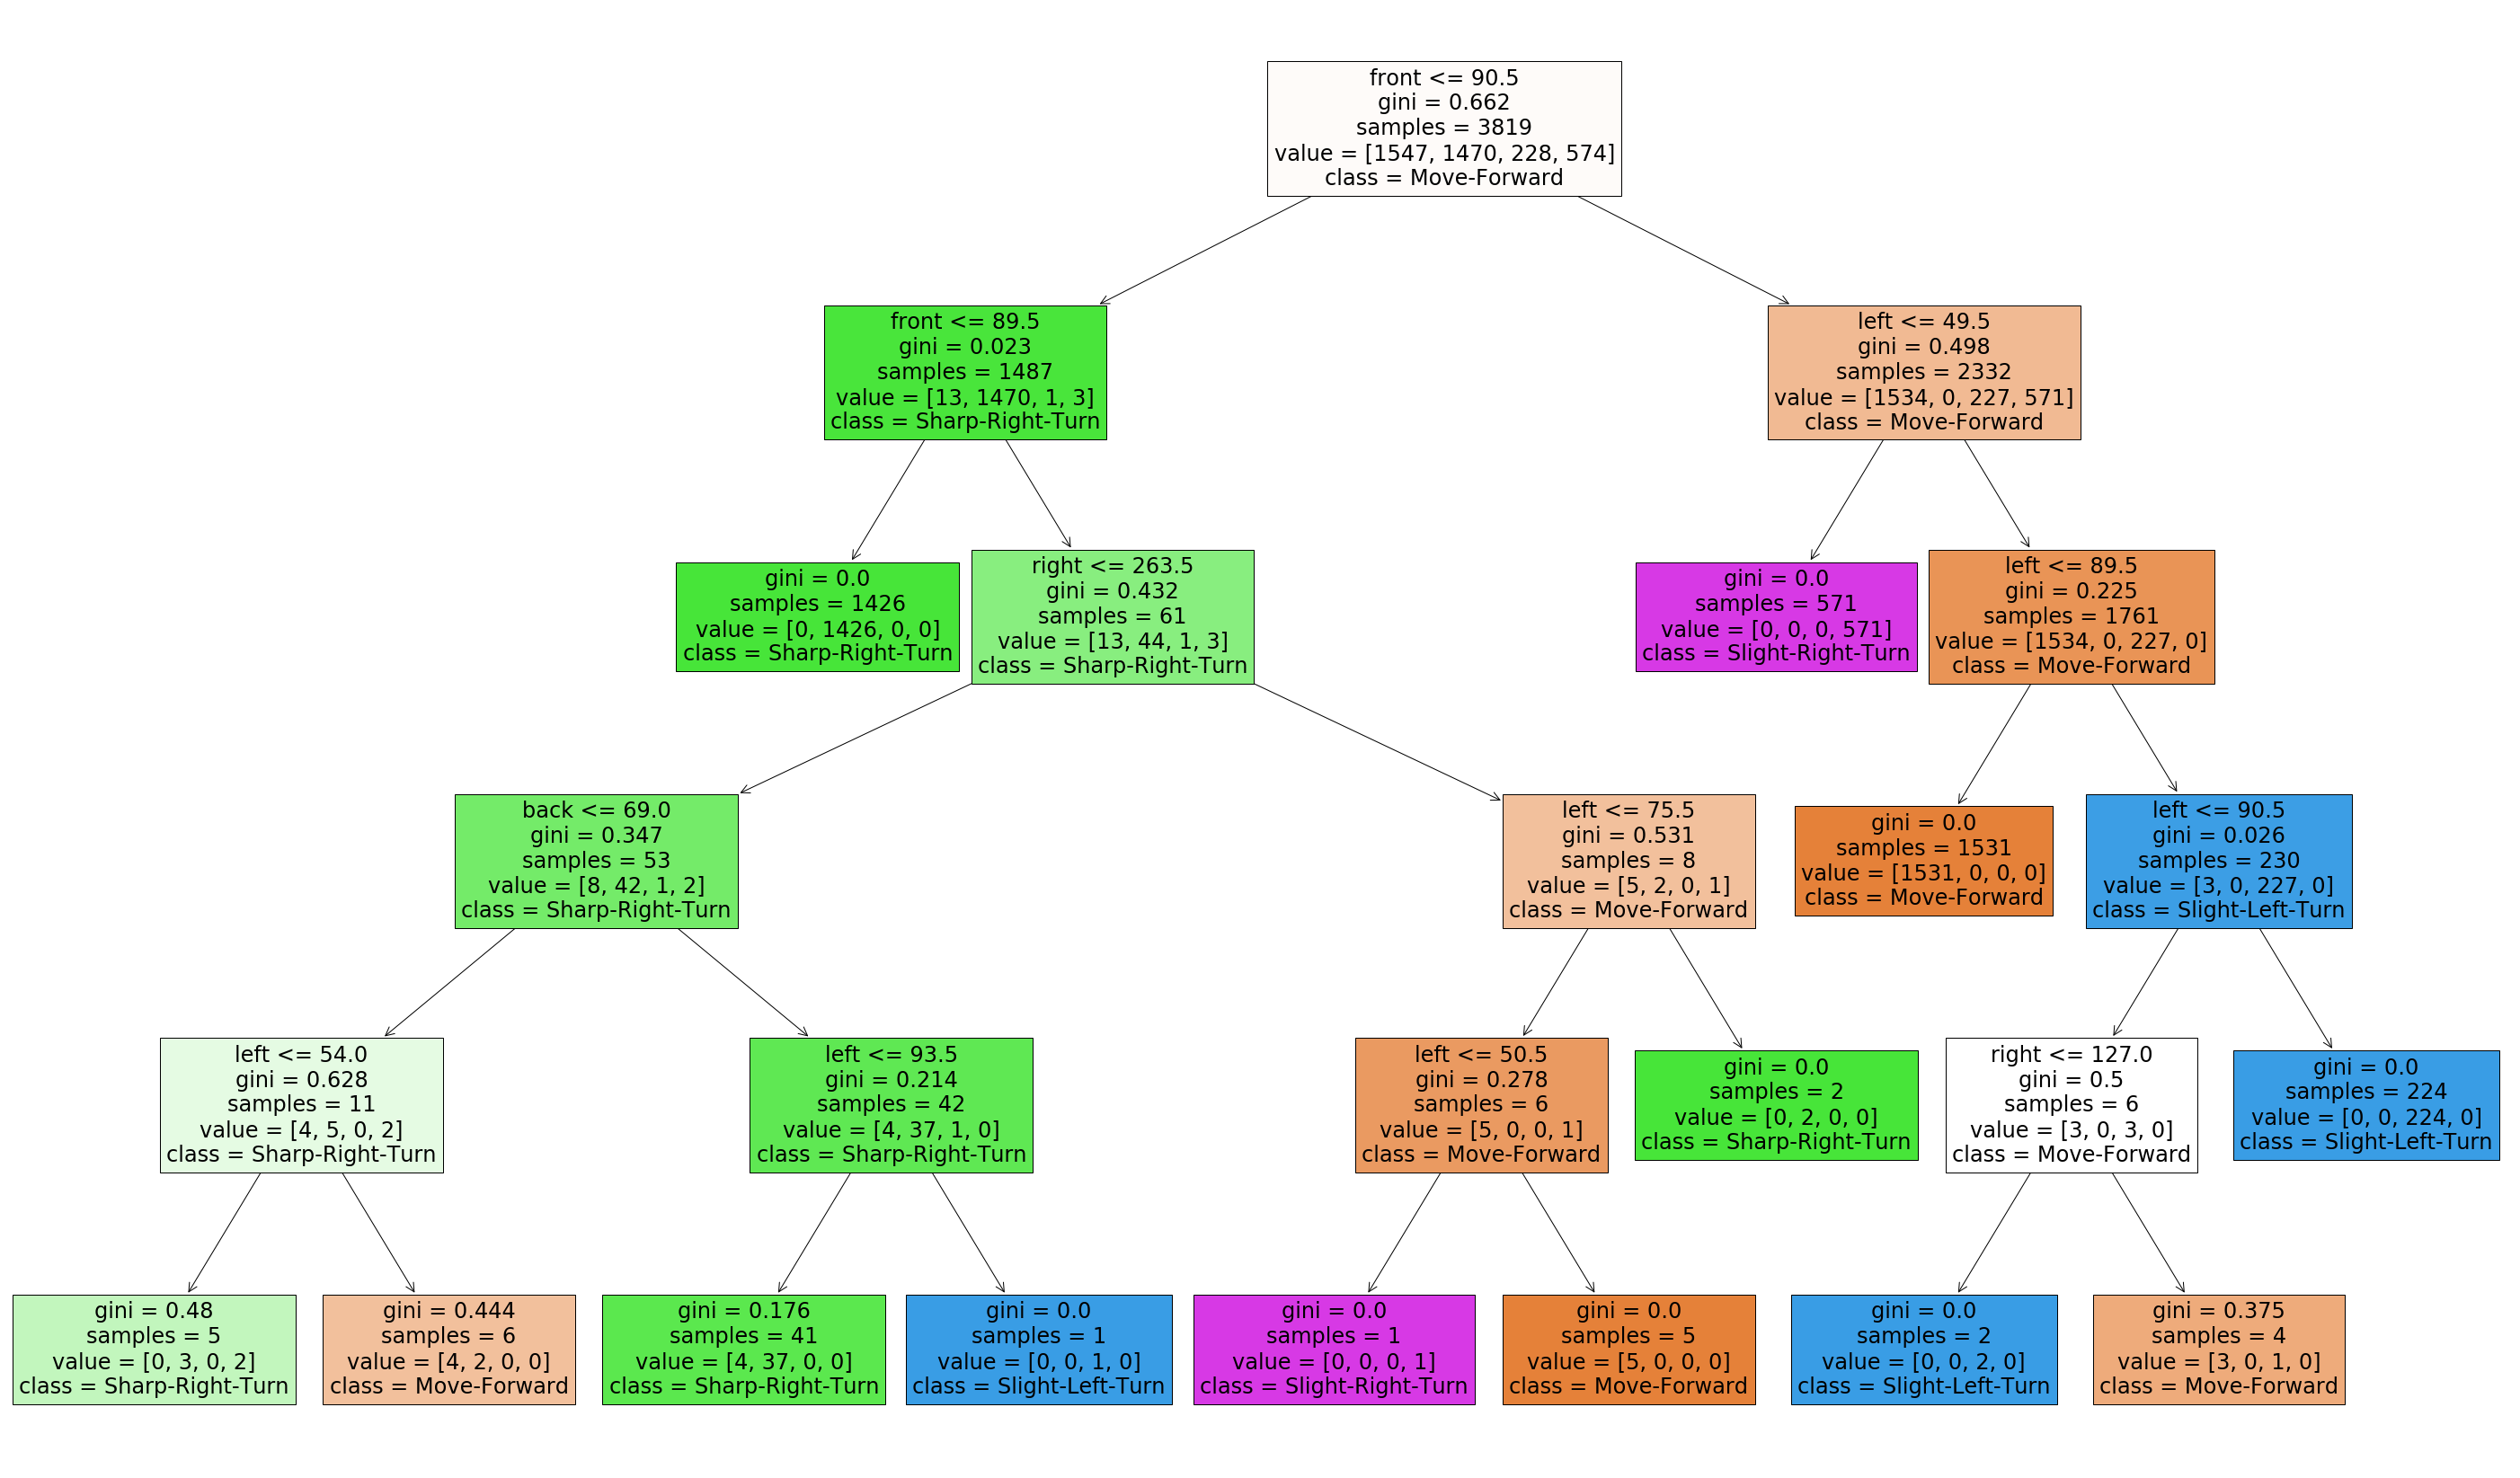

In [17]:
plt.figure(figsize=(50,30))
plot_tree(dtc, fontsize=24, filled=True, class_names=encoder.classes_, feature_names=feature_names)
plt.show()

In [18]:
n_nodes = dtc.tree_.node_count
children_left = dtc.tree_.children_left
children_right = dtc.tree_.children_right
feature = dtc.tree_.feature
threshold = dtc.tree_.threshold

# The tree structure can be traversed to compute various properties such
# as the depth of each node and whether or not it is a leaf.
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]  # seed is the root node id and its parent depth
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    # If we have a test node
    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

print('The binary tree structure has %s nodes and has '
      'the following tree structure:'
      % n_nodes)
for i in range(n_nodes):
    if is_leaves[i]:
        print('%snode=%s leaf node.' % (node_depth[i] * '\t', i))
    else:
        print('%snode=%s test node: go to node %s if X[:, %s] <= %s else to '
              'node %s.'
              % (node_depth[i] * '\t',
                 i,
                 children_left[i],
                 feature[i],
                 threshold[i],
                 children_right[i],
                 ))

The binary tree structure has 25 nodes and has the following tree structure:
node=0 test node: go to node 1 if X[:, 0] <= 90.5 else to node 16.
	node=1 test node: go to node 2 if X[:, 0] <= 89.5 else to node 3.
		node=2 leaf node.
		node=3 test node: go to node 4 if X[:, 2] <= 263.5 else to node 11.
			node=4 test node: go to node 5 if X[:, 3] <= 69.0 else to node 8.
				node=5 test node: go to node 6 if X[:, 1] <= 54.0 else to node 7.
					node=6 leaf node.
					node=7 leaf node.
				node=8 test node: go to node 9 if X[:, 1] <= 93.5 else to node 10.
					node=9 leaf node.
					node=10 leaf node.
			node=11 test node: go to node 12 if X[:, 1] <= 75.5 else to node 15.
				node=12 test node: go to node 13 if X[:, 1] <= 50.5 else to node 14.
					node=13 leaf node.
					node=14 leaf node.
				node=15 leaf node.
	node=16 test node: go to node 17 if X[:, 1] <= 49.5 else to node 18.
		node=17 leaf node.
		node=18 test node: go to node 19 if X[:, 1] <= 89.5 else to node 20.
			node=19 leaf no

In [241]:
'''
typedef struct Node {
    uint8_t isLeaf;
    int8_t value;  # class like 2
    struct Node * left;
    struct Node * right;
    int8_t feature;  # feature index like 1
    float32_t threshold;
} DT_Node;
'''

values = dtc.tree_.value.squeeze().argmax(axis=-1)
values[is_leaves == False] = -1

file = open('dt_model.h', 'w')

file.write('#define N_NODES %d\n\n' % (n_nodes))
file.write('#define DT_MODEL(name) ')

for i in range(n_nodes):
    file.write('{')
    file.write('%d,' % (int(is_leaves[i])))
    file.write('%d,' % (values[i]))
    
    if (children_left[i] < 0):
        file.write('NULL,')
    else:
        file.write('&name[%d],' % (children_left[i]))
        
    if (children_right[i] < 0):
        file.write('NULL,')
    else:
        file.write('&name[%d],' % (children_right[i]))
    
    file.write('%d,' % (feature[i]))
    file.write('%f,' % (threshold[i].astype(np.float32)))
    file.write('},')

file.write('\n')

file.close()

In [323]:
print('Model size on the computer:', (children_left.nbytes + children_right.nbytes +
                                      feature.nbytes + threshold.nbytes), 'Bytes')
print('Model size on the car:', (25 * 15), 'Bytes')

Model size on the computer: 800 Bytes
Model size on the car: 375 Bytes
